In [1]:
import pandas as pd

df = pd.read_excel('BASEBALL_stats_15.xlsx')

ModuleNotFoundError: No module named 'pandas'

In [2]:
df

,날짜,연도,경기장,팀명,홈/원정,타수,안타,득점,2루타,3루타,...,사구,희생플라이,타점,병살타,폭투,관중수,타율,출루율,장타율,단타율
0,2015-03-28,2015,대구,삼성,홈,38,13,6,3,0,...,0,0,6,0,0,10000,0.342,0.405,0.421,0.263
1,2015-03-28,2015,대구,SK,원정,31,5,1,1,1,...,0,0,1,1,1,10000,0.161,0.278,0.258,0.097
2,2015-03-28,2015,목동,넥센,홈,40,8,5,2,0,...,0,0,5,1,0,12500,0.200,0.304,0.400,0.100
3,2015-03-28,2015,목동,한화,원정,42,10,4,2,0,...,1,1,4,0,1,12500,0.238,0.353,0.286,0.190
4,2015-03-28,2015,잠실,두산,홈,35,12,9,0,1,...,0,2,9,0,0,21746,0.343,0.405,0.571,0.257
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14677,2025-04-27,2025,광주,LG,원정,30,5,2,1,0,...,0,0,1,2,0,20500,0.167,0.286,0.200,0.133
14678,2025-04-27,2025,잠실,두산,홈,34,13,13,4,0,...,1,1,13,2,0,23750,0.382,0.522,0.588,0.235
14679,2025-04-27,2025,잠실,롯데,원정,32,7,4,3,0,...,1,0,4,2,1,23750,0.219,0.306,0.406,0.094
14680,2025-04-27,2025,대구,삼성,홈,38,14,8,1,0,...,0,0,8,0,0,24000,0.368,0.442,0.632,0.263


In [3]:
df['상대팀'] = df['팀명'].shift(-1)
df.loc[df.index % 2 == 1, '상대팀'] = df['팀명'].shift(1)

In [4]:
df

,날짜,연도,경기장,팀명,홈/원정,타수,안타,득점,2루타,3루타,...,희생플라이,타점,병살타,폭투,관중수,타율,출루율,장타율,단타율,상대팀
0,2015-03-28,2015,대구,삼성,홈,38,13,6,3,0,...,0,6,0,0,10000,0.342,0.405,0.421,0.263,SK
1,2015-03-28,2015,대구,SK,원정,31,5,1,1,1,...,0,1,1,1,10000,0.161,0.278,0.258,0.097,삼성
2,2015-03-28,2015,목동,넥센,홈,40,8,5,2,0,...,0,5,1,0,12500,0.200,0.304,0.400,0.100,한화
3,2015-03-28,2015,목동,한화,원정,42,10,4,2,0,...,1,4,0,1,12500,0.238,0.353,0.286,0.190,넥센
4,2015-03-28,2015,잠실,두산,홈,35,12,9,0,1,...,2,9,0,0,21746,0.343,0.405,0.571,0.257,NC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14677,2025-04-27,2025,광주,LG,원정,30,5,2,1,0,...,0,1,2,0,20500,0.167,0.286,0.200,0.133,KIA
14678,2025-04-27,2025,잠실,두산,홈,34,13,13,4,0,...,1,13,2,0,23750,0.382,0.522,0.588,0.235,롯데
14679,2025-04-27,2025,잠실,롯데,원정,32,7,4,3,0,...,0,4,2,1,23750,0.219,0.306,0.406,0.094,두산
14680,2025-04-27,2025,대구,삼성,홈,38,14,8,1,0,...,0,8,0,0,24000,0.368,0.442,0.632,0.263,NC


In [5]:
df['연도'][0]

np.int64(2015)

In [6]:
def determine_result(df):
    results = []
    for i in range(0, len(df), 2):
        score1 = df.loc[i, '득점']
        score2 = df.loc[i+1, '득점']
        if score1 > score2:
            results.extend(['승', '패'])
        elif score1 < score2:
            results.extend(['패', '승'])
        else:
            results.extend(['무', '무'])
    return results

df['승리여부'] = determine_result(df)

df


,날짜,연도,경기장,팀명,홈/원정,타수,안타,득점,2루타,3루타,...,타점,병살타,폭투,관중수,타율,출루율,장타율,단타율,상대팀,승리여부
0,2015-03-28,2015,대구,삼성,홈,38,13,6,3,0,...,6,0,0,10000,0.342,0.405,0.421,0.263,SK,승
1,2015-03-28,2015,대구,SK,원정,31,5,1,1,1,...,1,1,1,10000,0.161,0.278,0.258,0.097,삼성,패
2,2015-03-28,2015,목동,넥센,홈,40,8,5,2,0,...,5,1,0,12500,0.200,0.304,0.400,0.100,한화,승
3,2015-03-28,2015,목동,한화,원정,42,10,4,2,0,...,4,0,1,12500,0.238,0.353,0.286,0.190,넥센,패
4,2015-03-28,2015,잠실,두산,홈,35,12,9,0,1,...,9,0,0,21746,0.343,0.405,0.571,0.257,NC,승
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14677,2025-04-27,2025,광주,LG,원정,30,5,2,1,0,...,1,2,0,20500,0.167,0.286,0.200,0.133,KIA,패
14678,2025-04-27,2025,잠실,두산,홈,34,13,13,4,0,...,13,2,0,23750,0.382,0.522,0.588,0.235,롯데,승
14679,2025-04-27,2025,잠실,롯데,원정,32,7,4,3,0,...,4,2,1,23750,0.219,0.306,0.406,0.094,두산,패
14680,2025-04-27,2025,대구,삼성,홈,38,14,8,1,0,...,8,0,0,24000,0.368,0.442,0.632,0.263,NC,승


In [7]:
import numpy as np

def calculate_team_matchup(df):
    matchup_result = []

    for i in range(len(df)):
        team = df.loc[i, '팀명']
        opponent = df.loc[i, '상대팀']
        date = df.loc[i, '날짜']

        # 과거 경기 중 해당 팀과 상대팀이 맞붙은 경기만 추출
        past_games = df[
            ((df['팀명'] == team) & (df['상대팀'] == opponent))&
            (df['날짜'] < date)
        ].copy()

        # 날짜 오름차순 정렬 후 최근 5경기 추출
        past_games = past_games.sort_values('날짜').tail(10)

        if len(past_games) < 10:
            matchup_result.append(np.nan)
        else:
            # 현재 팀이 승리한 경기 수 세기
            wins = (past_games['승리여부'] == '승').sum()
            matchup_result.append(round(wins / 10, 3))

    return matchup_result

df['팀상성'] = calculate_team_matchup(df)


In [8]:
df

,날짜,연도,경기장,팀명,홈/원정,타수,안타,득점,2루타,3루타,...,병살타,폭투,관중수,타율,출루율,장타율,단타율,상대팀,승리여부,팀상성
0,2015-03-28,2015,대구,삼성,홈,38,13,6,3,0,...,0,0,10000,0.342,0.405,0.421,0.263,SK,승,NaN
1,2015-03-28,2015,대구,SK,원정,31,5,1,1,1,...,1,1,10000,0.161,0.278,0.258,0.097,삼성,패,NaN
2,2015-03-28,2015,목동,넥센,홈,40,8,5,2,0,...,1,0,12500,0.200,0.304,0.400,0.100,한화,승,NaN
3,2015-03-28,2015,목동,한화,원정,42,10,4,2,0,...,0,1,12500,0.238,0.353,0.286,0.190,넥센,패,NaN
4,2015-03-28,2015,잠실,두산,홈,35,12,9,0,1,...,0,0,21746,0.343,0.405,0.571,0.257,NC,승,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14677,2025-04-27,2025,광주,LG,원정,30,5,2,1,0,...,2,0,20500,0.167,0.286,0.200,0.133,KIA,패,0.3
14678,2025-04-27,2025,잠실,두산,홈,34,13,13,4,0,...,2,0,23750,0.382,0.522,0.588,0.235,롯데,승,0.4
14679,2025-04-27,2025,잠실,롯데,원정,32,7,4,3,0,...,2,1,23750,0.219,0.306,0.406,0.094,두산,패,0.6
14680,2025-04-27,2025,대구,삼성,홈,38,14,8,1,0,...,0,0,24000,0.368,0.442,0.632,0.263,NC,승,0.7


In [9]:
df.tail(50)

,날짜,연도,경기장,팀명,홈/원정,타수,안타,득점,2루타,3루타,...,병살타,폭투,관중수,타율,출루율,장타율,단타율,상대팀,승리여부,팀상성
14632,2025-04-23,2025,고척,키움,홈,32,5,2,0,0,...,0,1,6801,0.156,0.308,0.250,0.125,두산,패,0.5
14633,2025-04-23,2025,고척,두산,원정,37,12,8,2,1,...,1,1,6801,0.324,0.409,0.514,0.216,키움,승,0.5
14634,2025-04-23,2025,수원,KT,홈,32,5,5,0,1,...,1,0,7581,0.156,0.270,0.406,0.062,SSG,패,0.5
14635,2025-04-23,2025,수원,SSG,원정,44,17,11,1,0,...,0,0,7581,0.386,0.413,0.682,0.273,KT,승,0.5
14636,2025-04-23,2025,잠실,LG,홈,30,6,3,2,0,...,0,0,17828,0.200,0.415,0.267,0.133,NC,승,0.7
14637,2025-04-23,2025,잠실,NC,원정,29,1,0,1,0,...,0,1,17828,0.034,0.152,0.069,0.000,LG,패,0.3
14638,2025-04-23,2025,사직,롯데,홈,39,13,4,2,0,...,1,0,19376,0.333,0.381,0.385,0.282,한화,패,0.7
14639,2025-04-23,2025,사직,한화,원정,34,8,6,3,0,...,1,1,19376,0.235,0.308,0.324,0.147,롯데,승,0.3
14640,2025-04-23,2025,대구,삼성,홈,34,12,7,1,0,...,0,0,22257,0.353,0.378,0.559,0.265,KIA,승,0.2
14641,2025-04-23,2025,대구,KIA,원정,33,8,2,3,0,...,1,0,22257,0.242,0.278,0.333,0.152,삼성,패,0.8


In [10]:
def get_recent_data(df, stadium, team, location, num_games=5):
    """
    경기장, 팀명, 홈/원정 조건이 모두 일치하는 최근 경기 데이터를 반환합니다.

    Parameters:
        df (DataFrame): 전체 경기 데이터프레임
        stadium (str): 경기장 이름
        team (str): 팀명
        location (str): '홈' 또는 '원정'
        num_games (int): 반환할 경기 수 (기본값 5)

    Returns:
        DataFrame: 조건에 맞는 최근 경기 데이터프레임
    """
    # 조건에 맞는 경기 필터링
    filtered = df[
        (df['경기장'] == stadium) &
        (df['팀명'] == team) &
        (df['홈/원정'] == location)
    ]

    # 날짜 기준 내림차순 정렬 후 상위 n개 추출
    recent_games = filtered.sort_values('날짜', ascending=False).head(num_games)

    return recent_games.reset_index(drop=True)

In [11]:
test = get_recent_data(df, '대구', '삼성', '홈', 10)

In [12]:
test

,날짜,연도,경기장,팀명,홈/원정,타수,안타,득점,2루타,3루타,...,병살타,폭투,관중수,타율,출루율,장타율,단타율,상대팀,승리여부,팀상성
0,2025-04-27,2025,대구,삼성,홈,38,14,8,1,0,...,0,0,24000,0.368,0.442,0.632,0.263,NC,승,0.7
1,2025-04-26,2025,대구,삼성,홈,33,11,9,2,0,...,1,0,24000,0.333,0.455,0.394,0.273,NC,승,0.7
2,2025-04-25,2025,대구,삼성,홈,33,10,10,0,0,...,1,0,24000,0.303,0.452,0.576,0.212,NC,승,0.7
3,2025-04-24,2025,대구,삼성,홈,43,21,17,6,1,...,0,0,24000,0.488,0.521,0.884,0.256,KIA,승,0.3
4,2025-04-23,2025,대구,삼성,홈,34,12,7,1,0,...,0,0,22257,0.353,0.378,0.559,0.265,KIA,승,0.2
5,2025-04-20,2025,대구,삼성,홈,34,9,3,1,0,...,1,0,24000,0.265,0.419,0.294,0.235,롯데,패,0.7
6,2025-04-19,2025,대구,삼성,홈,34,13,10,2,0,...,1,0,24000,0.382,0.463,0.794,0.206,롯데,승,0.6
7,2025-04-18,2025,대구,삼성,홈,37,10,1,2,0,...,0,1,24000,0.270,0.325,0.405,0.189,롯데,패,0.6
8,2025-04-10,2025,대구,삼성,홈,35,7,3,3,0,...,0,0,21291,0.200,0.282,0.286,0.114,SSG,승,0.6
9,2025-04-09,2025,대구,삼성,홈,43,10,1,1,0,...,0,1,20632,0.233,0.250,0.326,0.186,SSG,패,0.6


RMSE: 1.761
R² Score: 0.759


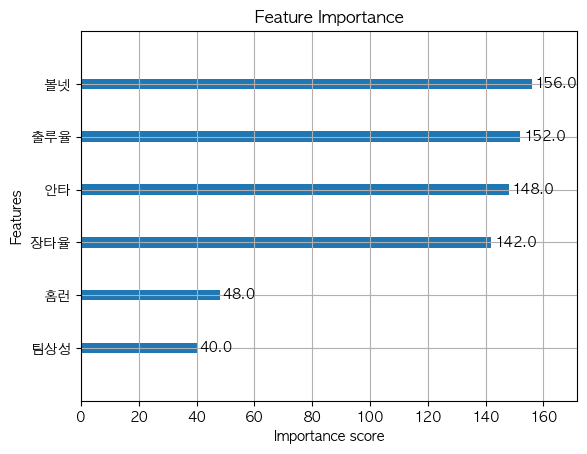

In [13]:
#안타, 장타율, 출루율, 홈런, 볼넷, 팀상성

import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
from datetime import timedelta


mpl.rc('font', family='AppleGothic')  # macOS
mpl.rcParams['axes.unicode_minus'] = False  # 마이너스 기호 깨짐 방지

# 사용할 feature들과 target
features = ['안타', '장타율', '출루율', '홈런', '볼넷', '팀상성']
target = '득점'

# X, y 구성
X = df[features]
y = df[target]


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

model = xgb.XGBRegressor(
    objective='reg:squarederror',
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    random_state=42
)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# RMSE 계산 (루트 씌우기)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse:.3f}")
print(f"R² Score: {r2:.3f}")


xgb.plot_importance(model)
plt.title('Feature Importance')
plt.show()

In [28]:
import pickle
with open('./df' + ".pickle","wb") as f:
    pickle.dump(df, f)

# 위는 전처리

In [5]:
!pip install numpy._core

ERROR: Could not find a version that satisfies the requirement numpy._core (from versions: none)
ERROR: No matching distribution found for numpy._core


In [8]:
import pickle
import numpy as np

with open("./df.pickle","rb") as f:
    df = pickle.load(f)

df

ModuleNotFoundError: No module named 'numpy._core'

In [45]:
def make_model(df, date, n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42, features = ['안타', '장타율', '출루율', '홈런', '볼넷', '팀상성']):
    # 사용할 feature들과 target
    target = '득점'

    #현재 날짜(date)기준 과거 경기만을 사용
    
    df = df[(df['날짜'] < pd.to_datetime(date))]

    # X, y 구성
    X_train = df[features]
    y_train = df[target]

    model = xgb.XGBRegressor(
        objective='reg:squarederror',
        n_estimators=n_estimators,
        learning_rate=learning_rate,
        max_depth=max_depth,
        random_state=random_state
    )

    model.fit(X_train, y_train)

    return model
    #y_pred = model.predict(X_test)

    # RMSE 계산 (루트 씌우기)
    #rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    #r2 = r2_score(y_test, y_pred)

    #print(f"RMSE: {rmse:.3f}")
    #print(f"R² Score: {r2:.3f}")

In [46]:
df['팀상성'] = df['팀상성'].fillna(0.5)
df

,날짜,연도,경기장,팀명,홈/원정,타수,안타,득점,2루타,3루타,...,병살타,폭투,관중수,타율,출루율,장타율,단타율,상대팀,승리여부,팀상성
0,2015-03-28,2015,대구,삼성,홈,38,13,6,3,0,...,0,0,10000,0.342,0.405,0.421,0.263,SK,승,0.5
1,2015-03-28,2015,대구,SK,원정,31,5,1,1,1,...,1,1,10000,0.161,0.278,0.258,0.097,삼성,패,0.5
2,2015-03-28,2015,목동,넥센,홈,40,8,5,2,0,...,1,0,12500,0.200,0.304,0.400,0.100,한화,승,0.5
3,2015-03-28,2015,목동,한화,원정,42,10,4,2,0,...,0,1,12500,0.238,0.353,0.286,0.190,넥센,패,0.5
4,2015-03-28,2015,잠실,두산,홈,35,12,9,0,1,...,0,0,21746,0.343,0.405,0.571,0.257,NC,승,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14677,2025-04-27,2025,광주,LG,원정,30,5,2,1,0,...,2,0,20500,0.167,0.286,0.200,0.133,KIA,패,0.3
14678,2025-04-27,2025,잠실,두산,홈,34,13,13,4,0,...,2,0,23750,0.382,0.522,0.588,0.235,롯데,승,0.4
14679,2025-04-27,2025,잠실,롯데,원정,32,7,4,3,0,...,2,1,23750,0.219,0.306,0.406,0.094,두산,패,0.6
14680,2025-04-27,2025,대구,삼성,홈,38,14,8,1,0,...,0,0,24000,0.368,0.442,0.632,0.263,NC,승,0.7


In [49]:
# 원핫 인코딩 대상 열
cols_to_encode = ['홈/원정', '경기장']

# One-hot encoding
df_encoded = pd.get_dummies(df, columns=['홈/원정', '경기장'], prefix=['홈/원정', '경기장'], dtype=int)
df_encoded

,날짜,연도,팀명,타수,안타,득점,2루타,3루타,홈런,볼넷,...,경기장_마산,경기장_목동,경기장_문학,경기장_사직,경기장_수원,경기장_울산,경기장_잠실,경기장_창원,경기장_청주,경기장_포항
0,2015-03-28,2015,삼성,38,13,6,3,0,0,4,...,0,0,0,0,0,0,0,0,0,0
1,2015-03-28,2015,SK,31,5,1,1,1,0,5,...,0,0,0,0,0,0,0,0,0,0
2,2015-03-28,2015,넥센,40,8,5,2,0,2,6,...,0,1,0,0,0,0,0,0,0,0
3,2015-03-28,2015,한화,42,10,4,2,0,0,7,...,0,1,0,0,0,0,0,0,0,0
4,2015-03-28,2015,두산,35,12,9,0,1,2,5,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14677,2025-04-27,2025,LG,30,5,2,1,0,0,5,...,0,0,0,0,0,0,0,0,0,0
14678,2025-04-27,2025,두산,34,13,13,4,0,1,10,...,0,0,0,0,0,0,1,0,0,0
14679,2025-04-27,2025,롯데,32,7,4,3,0,1,3,...,0,0,0,0,0,0,1,0,0,0
14680,2025-04-27,2025,삼성,38,14,8,1,0,3,5,...,0,0,0,0,0,0,0,0,0,0


In [16]:
def predict_score(model, features, date, team_name):
    # 1. 날짜 이전의 해당 팀 경기만 필터링
    team_games = df[(df['팀명'] == team_name) & (df['날짜'] < pd.to_datetime(date))]

    # 2. 최근 10경기 선택
    recent_games = team_games.sort_values('날짜', ascending=False).head(10)

    # 3. 최근 경기 수가 부족하면 None 반환
    if len(recent_games) < 10:
        return None

    # 4. 평균 feature 값 계산
    feature_cols = features
    x = recent_games[feature_cols].mean().values.reshape(1, -1)

    # 5. 예측
    predicted_score = model.predict(x)[0]

    return predicted_score


In [ ]:
#안타, 장타율, 출루율, 홈런, 볼넷, 팀상성

import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
from datetime import timedelta

def test_model(df, n_estimators, learning_rate, max_depth, random_state, features):
    success = []
    model_cache = {}
    for i in range(0, len(df)):
        try:
            row = df.iloc[i]
            y = row['승리여부']
            x = row['팀명']
            you = row['상대팀']
            today = row['날짜']

            # 캐싱된 모델 재사용
            if today not in model_cache:
                model = make_model(df, today, n_estimators, learning_rate, max_depth, random_state, features)
                model_cache[today] = model
            else:
                model = model_cache[today]

            predicted_score_me = predict_score(model, features, today, x)
            predicted_score_you = predict_score(model, features, today, you)

            if predicted_score_me > predicted_score_you:
                y_hat = '승'
            else:
                y_hat = '패'
            
            if y_hat == y:
                success.append(1)
            else:
                success.append(0)
        except:
            success.append(-1)
        print(i, success[-1])
    return success
        
      

In [52]:
pd.set_option('display.max_columns', None)

In [53]:
df_encoded

,날짜,연도,팀명,타수,안타,득점,2루타,3루타,홈런,볼넷,사구,희생플라이,타점,병살타,폭투,관중수,타율,출루율,장타율,단타율,상대팀,승리여부,팀상성,홈/원정_원정,홈/원정_홈,경기장_고척,경기장_광주,경기장_대구,경기장_대전,경기장_대전(신),경기장_마산,경기장_목동,경기장_문학,경기장_사직,경기장_수원,경기장_울산,경기장_잠실,경기장_창원,경기장_청주,경기장_포항
0,2015-03-28,2015,삼성,38,13,6,3,0,0,4,0,0,6,0,0,10000,0.342,0.405,0.421,0.263,SK,승,0.5,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,2015-03-28,2015,SK,31,5,1,1,1,0,5,0,0,1,1,1,10000,0.161,0.278,0.258,0.097,삼성,패,0.5,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
2,2015-03-28,2015,넥센,40,8,5,2,0,2,6,0,0,5,1,0,12500,0.200,0.304,0.400,0.100,한화,승,0.5,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,2015-03-28,2015,한화,42,10,4,2,0,0,7,1,1,4,0,1,12500,0.238,0.353,0.286,0.190,넥센,패,0.5,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,2015-03-28,2015,두산,35,12,9,0,1,2,5,0,2,9,0,0,21746,0.343,0.405,0.571,0.257,NC,승,0.5,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14677,2025-04-27,2025,LG,30,5,2,1,0,0,5,0,0,1,2,0,20500,0.167,0.286,0.200,0.133,KIA,패,0.3,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
14678,2025-04-27,2025,두산,34,13,13,4,0,1,10,1,1,13,2,0,23750,0.382,0.522,0.588,0.235,롯데,승,0.4,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
14679,2025-04-27,2025,롯데,32,7,4,3,0,1,3,1,0,4,2,1,23750,0.219,0.306,0.406,0.094,두산,패,0.6,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
14680,2025-04-27,2025,삼성,38,14,8,1,0,3,5,0,0,8,0,0,24000,0.368,0.442,0.632,0.263,NC,승,0.7,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
features = ['타수', '득점', '안타', '2루타', '3루타', '사구', '희생플라이', '타점', '폭투', '관중수', '출루율', '장타율', '출루율', '홈런', '볼넷', '팀상성', '홈/원정_홈', '홈/원정_원정']

result = test_model(df_encoded, n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42, features = features)

0 -1
1 -1
2 -1
3 -1
4 -1
5 -1
6 -1
7 -1
8 -1
9 -1
10 -1
11 -1
12 -1
13 -1
14 -1
15 -1
16 -1
17 -1
18 -1
19 -1
20 -1
21 -1
22 -1
23 -1
24 -1
25 -1
26 -1
27 -1
28 -1
29 -1
30 -1
31 -1
32 -1
33 -1
34 -1
35 -1
36 -1
37 -1
38 -1
39 -1
40 -1
41 -1
42 -1
43 -1
44 -1
45 -1
46 -1
47 -1
48 -1
49 -1
50 -1
51 -1
52 -1
53 -1
54 -1
55 -1
56 -1
57 -1
58 -1
59 -1
60 -1
61 -1
62 -1
63 -1
64 -1
65 -1
66 -1
67 -1
68 -1
69 -1
70 -1
71 -1
72 -1
73 -1
74 -1
75 -1
76 -1
77 -1
78 -1
79 -1
80 -1
81 -1
82 -1
83 -1
84 -1
85 -1
86 -1
87 -1
88 -1
89 -1
90 -1
91 -1
92 -1
93 -1
94 -1
95 -1
96 -1
97 -1
98 -1
99 -1
100 -1
101 -1
102 -1
103 -1
104 -1
105 -1
106 -1
107 -1
108 -1
109 -1
110 -1
111 -1
112 -1
113 -1
114 -1
115 -1
116 -1
117 -1
118 -1
119 -1
120 -1
121 -1
122 -1
123 -1
124 -1
125 -1
126 -1
127 -1
128 -1
129 -1
130 -1
131 -1
132 -1
133 -1
134 -1
135 -1
136 -1
137 -1
138 -1
139 -1
140 -1
141 -1
142 -1
143 -1
144 -1
145 -1
146 -1
147 -1
148 -1
149 -1
150 -1
151 -1
152 -1
153 -1
154 -1
155 -1
156 -1
157 -1
158 

Exception ignored in: <function DataIter.__del__ at 0x114ef7ba0>
Traceback (most recent call last):
  File "/opt/anaconda3/envs/Baseball/lib/python3.12/site-packages/xgboost/core.py", line 576, in __del__
    assert self._exception is None
           ^^^^^^^^^^^^^^^^^^^^^^^
AssertionError: 


2706 -1
2707 -1
2708 -1
2709 -1
2710 -1
2711 -1
2712 -1
2713 -1
2714 -1
2715 -1
2716 -1
2717 -1
2718 -1
2719 -1
2720 -1
2721 -1
2722 -1
2723 -1
2724 -1
2725 -1
2726 -1
2727 -1
2728 -1
2729 -1
2730 -1
2731 -1
2732 -1
2733 -1
2734 -1
2735 -1
2736 -1
2737 -1
2738 -1
2739 -1
2740 -1
2741 -1
2742 -1
2743 -1
2744 -1
2745 -1
2746 -1
2747 -1
2748 -1
2749 -1
2750 -1
2751 -1
2752 -1
2753 -1
2754 -1
2755 -1
2756 -1
2757 -1
2758 -1
2759 -1
2760 -1
2761 -1
2762 -1
2763 -1
2764 -1
2765 -1
2766 -1
2767 -1
2768 -1
2769 -1
2770 -1
2771 -1
2772 -1
2773 -1
2774 -1
2775 -1
2776 -1
2777 -1
2778 -1
2779 -1
2780 -1
2781 -1
2782 -1
2783 -1
2784 -1
2785 -1
2786 -1
2787 -1
2788 -1
2789 -1
2790 -1
2791 -1
2792 -1
2793 -1
2794 -1
2795 -1
2796 -1
2797 -1
2798 -1
2799 -1
2800 -1
2801 -1
2802 -1
2803 -1
2804 -1
2805 -1
2806 -1
2807 -1
2808 -1
2809 -1
2810 -1
2811 -1
2812 -1
2813 -1
2814 -1
2815 -1
2816 -1
2817 -1
2818 -1
2819 -1
2820 -1
2821 -1
2822 -1
2823 -1
2824 -1
2825 -1
2826 -1
2827 -1
2828 -1
2829 -1
2830 -1


In [33]:
import pickle
with open('./result' + ".pickle","wb") as f:
    pickle.dump(result, f)

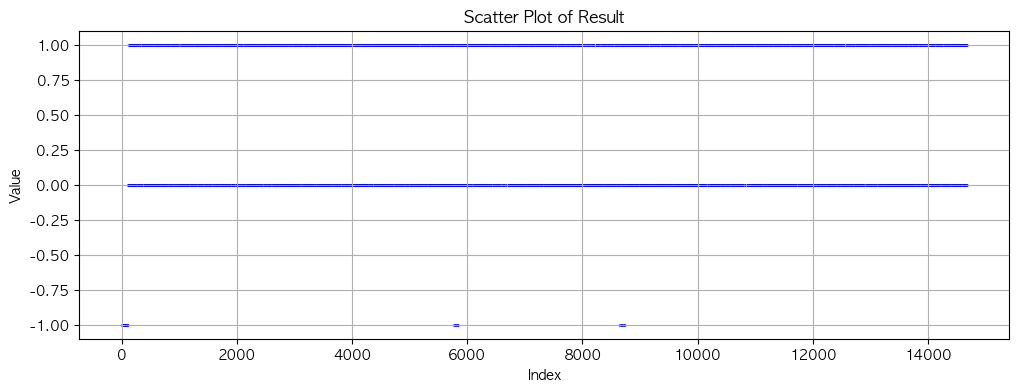

In [34]:
import matplotlib.pyplot as plt

x = list(range(len(result)))  # 인덱스를 x축
y = result  # 값을 y축

plt.figure(figsize=(12, 4))
plt.scatter(x, y, s=0.1, c='blue')  # s는 점 크기
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Scatter Plot of Result')
plt.grid(True)
plt.show()


In [35]:
from collections import Counter

counts = Counter(result)
print(counts)

Counter({1: 7297, 0: 7241, -1: 144})


In [20]:
score = predict_score("2015-05-10", "두산")
print(f"예측된 득점: {score:.2f}")

TypeError: predict_score() missing 2 required positional arguments: 'date' and 'team_name'

In [ ]:
from datetime import timedelta

pd.to_datetime("2015-05-10") - timedelta(days=1)

Timestamp('2015-05-09 00:00:00')

In [ ]:
len(df)

14682

In [ ]:
df.iloc[0]

날짜       2015-03-28 00:00:00
연도                      2015
경기장                       대구
팀명                        삼성
홈/원정                       홈
타수                        38
안타                        13
득점                         6
2루타                        3
3루타                        0
홈런                         0
볼넷                         4
사구                         0
희생플라이                      0
타점                         6
병살타                        0
폭투                         0
관중수                    10000
타율                     0.342
출루율                    0.405
장타율                    0.421
단타율                    0.263
상대팀                       SK
승리여부                       승
팀상성                      0.5
Name: 0, dtype: object